In [47]:
import pandas as pd
import numpy as np
import nltk
# from nltk.corpus import stopwords
import string
import warnings
warnings.simplefilter("ignore")

In [48]:
df=pd.read_csv('spam.csv',encoding=" 'latin' ")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [49]:
#Shape of the dataset
df.shape

(5572, 5)

In [51]:
#Columns in the dataset
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [52]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [53]:
#Removing the duplicates
df.drop_duplicates(inplace=True)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [54]:
df.duplicated().sum()

0

In [55]:
#Checking for the null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

In [56]:
import seaborn as sns

<AxesSubplot:xlabel='v1', ylabel='count'>

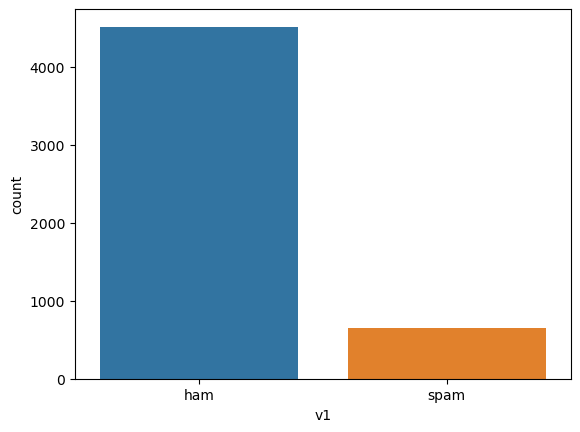

In [57]:
sns.countplot(df['v1'])

In [58]:
X = df['v2'].values
y = df['v1'].values

In [55]:
X

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [59]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [60]:
#Split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

In [63]:
print(X_train)

["Also remember the beads don't come off. Ever."
 "Call me when u're done..."
 '\\Im at arestaurant eating squid! i will be out about 10:30 wanna dosomething or is that to late?\\""'
 ...
 "How's my loverboy doing ? What does he do that keeps him from coming to his Queen, hmmm ? Doesn't he ache to speak to me ? Miss me desparately ?"
 'I havent lei.. Next mon can?' 'See you there! ']


In [64]:
print(X_test)

['Dunno da next show aft 6 is 850. Toa payoh got 650.'
 'Thanx 4 2day! U r a goodmate I THINK UR RITE SARY! ASUSUAL!1 U CHEERED ME UP! LOVE U FRANYxxxxx'
 'But my family not responding for anything. Now am in room not went to home for diwali but no one called me and why not coming. It makes me feel like died.'
 ...
 'Ok. Not much to do here though. H&M Friday, cant wait. Dunno wot the hell im gonna do for another 3 weeks! Become a slob- oh wait, already done that! '
 "She just broke down a list of reasons why nobody's in town and I can't tell if she's being sarcastic or just faggy"
 'I am 6 ft. We will be a good combination!']


In [61]:
print(y_train)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [62]:
print(y_test)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4135,)
(4135,)
(1034,)
(1034,)


In [65]:
#Preprossing the data
from sklearn.feature_extraction.text import CountVectorizer


In [66]:
cv = CountVectorizer()
x_train = cv.fit_transform(X_train)

In [67]:
x_train.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
len(x_train.toarray()[0])


7594

In [69]:
#Training 
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [70]:
#Fitting the model
nb.fit(x_train, y_train)

MultinomialNB()

In [71]:
x_test = cv.transform(X_test)
x_test

<1034x7594 sparse matrix of type '<class 'numpy.int64'>'
	with 12823 stored elements in Compressed Sparse Row format>

In [72]:
len(x_test.toarray())


1034

In [73]:
y_pred = nb.predict(x_test)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
print("Testing Accuracy:")
accuracy_score(y_pred, y_test)

Testing Accuracy:


0.9816247582205029

In [76]:
print("Training Accuracy:")
nb.score(x_train,y_train)

Training Accuracy:


0.9929866989117292

In [77]:
df = pd.DataFrame({'Predicted': y_pred, 'True': y_test})
print(df)

     Predicted True
0          ham  ham
1          ham  ham
2          ham  ham
3          ham  ham
4          ham  ham
...        ...  ...
1029       ham  ham
1030       ham  ham
1031       ham  ham
1032       ham  ham
1033       ham  ham

[1034 rows x 2 columns]
